In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import rv_discrete, rv_histogram, binom, mode, triang, kstest
from statsmodels.distributions.empirical_distribution import ECDF

### <center> Ejercicio <center>

La producción diaria de un artículo se distribuye triangularmente entre 4500, 6000 y 9000 unidades. La fracción defectuosa cada día P, se distribuye según la siguiente fdp:

$f(p) = 99(1-p)^98$

a. Estime la producción neta diaria

b. $P(Unidades defectuosas > 150)$

In [19]:
produccion_diaria = [4500, 6000, 9000]
trial = 100000

In [3]:
distribucion = triang(
    c = (produccion_diaria[1] - produccion_diaria[0]) / (produccion_diaria[2] - produccion_diaria[0]),
    loc = produccion_diaria[0],
    scale = produccion_diaria[2] - produccion_diaria[0]
)

In [20]:
produccion_neta = []
produccion_defectuosa = []

for _ in range(trial):
    produccion = distribucion.rvs()
    
    r = np.random.uniform(0,1)
    p_value = 1 - (1 - r) ** (1/99)
    
    produccion_mala = binom.rvs(int(produccion), p_value)
    produccion_neta.append(produccion - produccion_mala)
    produccion_defectuosa.append(produccion_mala)
    

Media: 6435.31
Mediana: 6338.59
Minimo: 4283.49
Maximo: 8983.57
Percentil 20: 5604.94
Percentil 80: 7287.93
P(Unidades Defectuosas > 150): 10.1080%


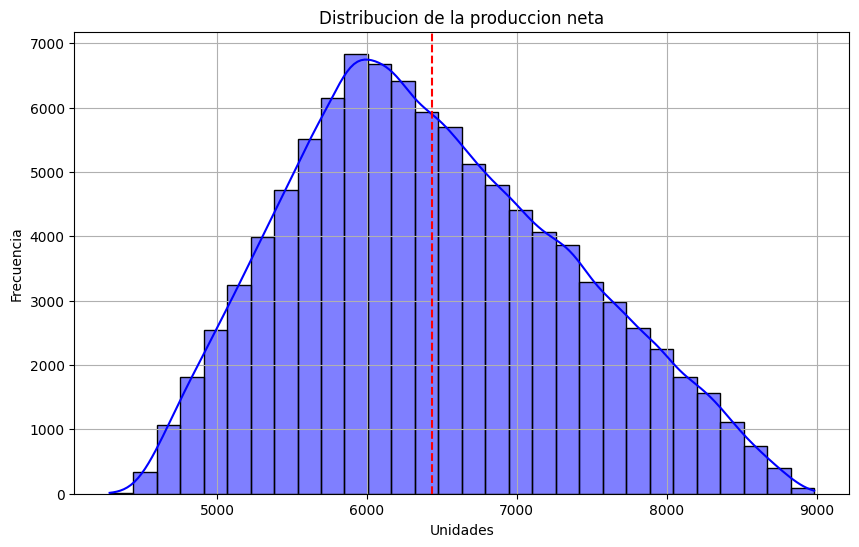

In [26]:
probabilidad_defectuosa = np.array(produccion_defectuosa)

print(f'Media: {np.mean(produccion_neta):.2f}')
print(f'Mediana: {np.median(produccion_neta):.2f}')
print(f'Minimo: {np.min(produccion_neta):.2f}')
print(f'Maximo: {np.max(produccion_neta):.2f}')
print(f'Percentil 20: {np.percentile(produccion_neta, 20):.2f}')
print(f'Percentil 80: {np.percentile(produccion_neta, 80):.2f}')

print(f'P(Unidades Defectuosas > 150): {(np.mean(probabilidad_defectuosa > 150)* 100):.4f}%')

# Grafico de la distribucion
plt.figure(figsize=(10, 6))
sns.histplot(produccion_neta, bins=30, kde=True, color="blue")
plt.title('Distribucion de la produccion neta')
plt.axvline(np.mean(produccion_neta), color='red', linestyle='--', label='Media')
plt.xlabel('Unidades')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()